# **[AID2003-01] Regression Analysis**

- **Lecturer**: Sangsoo Lim, *Assistant Professor*, Dongguk University

- **e-mail**: sslim@dgu.ac.kr

- **Homepage**: [sangsoolim.notion.site](https://sangsoolim.notion.site)


# Set up your own Colab

- **add** - above: a / - below: b
- **delete**: ctrl + m + d
- **split**: (place cursor) ctrl + m + -
- **merge**: No shortcut at default. (I set to ctrl + m + u)

In [1]:
#importing required Library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#model building Library
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split

%matplotlib inline
plt.style.use('seaborn-whitegrid')

/var/folders/5r/bcxwxb6x521399lvd_5y9jwm0000gn/T/ipykernel_19606/2702555831.py:15: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


# Simple Linear Regression

We will start with the most familiar linear regression, a straight-line fit to data.
A straight-line fit is a model of the form:
$$
y = ax + b
$$
where $a$ is commonly known as the *slope*, and $b$ is commonly known as the *intercept*.

Consider the following data, which is scattered about a line with a slope of 2 and an intercept of –5 (see the following figure):

In [2]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
print(x.shape)

(50,)


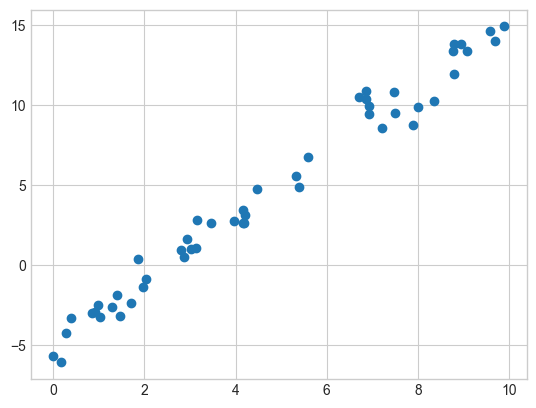

In [3]:
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y);

We can use Scikit-Learn's `LinearRegression` estimator to fit this data and construct the best-fit line, as shown in the following figure:

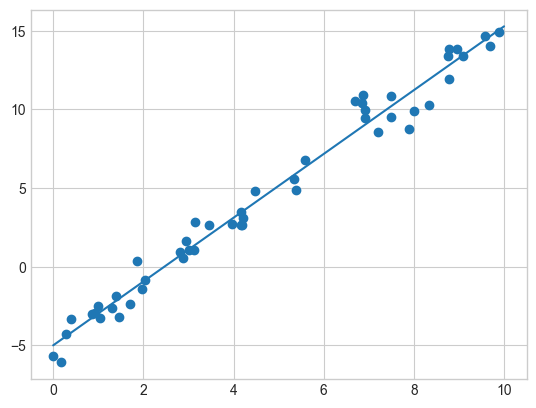

In [4]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True) # initialize

model.fit(x[:, np.newaxis], y) # np.newaxis: 존재하는 numpy array의 차원을 늘려준다.

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit); # plot x and y using default line style and color

The slope and intercept of the data are contained in the model's fit parameters, which in Scikit-Learn are always marked by a trailing underscore.
Here the relevant parameters are `coef_` and `intercept_`:

In [5]:
print("Model {:<10}: {:<5}".format("slope", round(model.coef_[0],2) ) )
print("Model {:<10}: {:<5}".format("intercept", round(model.intercept_,2) ) )

Model slope     : 2.03 
Model intercept : -5.0 


## Read Example *dataset*


In [6]:
adv = pd.read_csv("https://raw.githubusercontent.com/rkmishracs/dataset/main/advertising.csv")
adv.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [7]:
adv.shape

(200, 4)

### Dataset details

Info will tell us any *non null values* present in dataset

In [8]:
adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


### Describe Data

Its gives a summary of all statistics.

In [9]:
adv.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


### Data Visualisation: TV Vs Sales

<Axes: xlabel='TV', ylabel='Sales'>

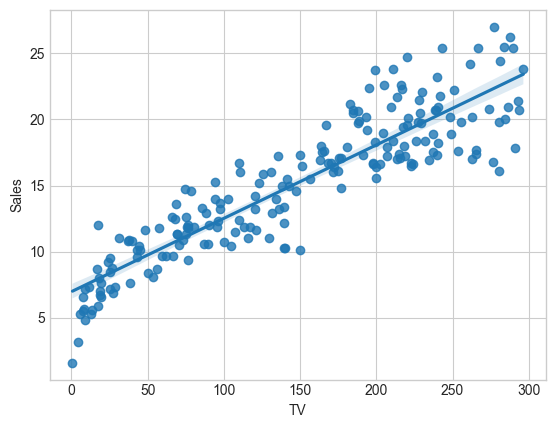

In [10]:
sns.regplot(x='TV', y='Sales', data=adv)

### Visualisation:Pairplot->X-Axis(all predictors) and Y-Axis(Target variable)

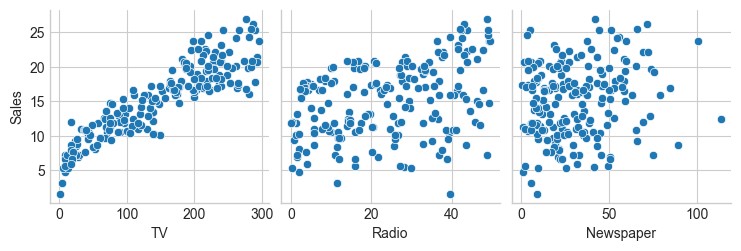

In [11]:
sns.pairplot(data=adv, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales')

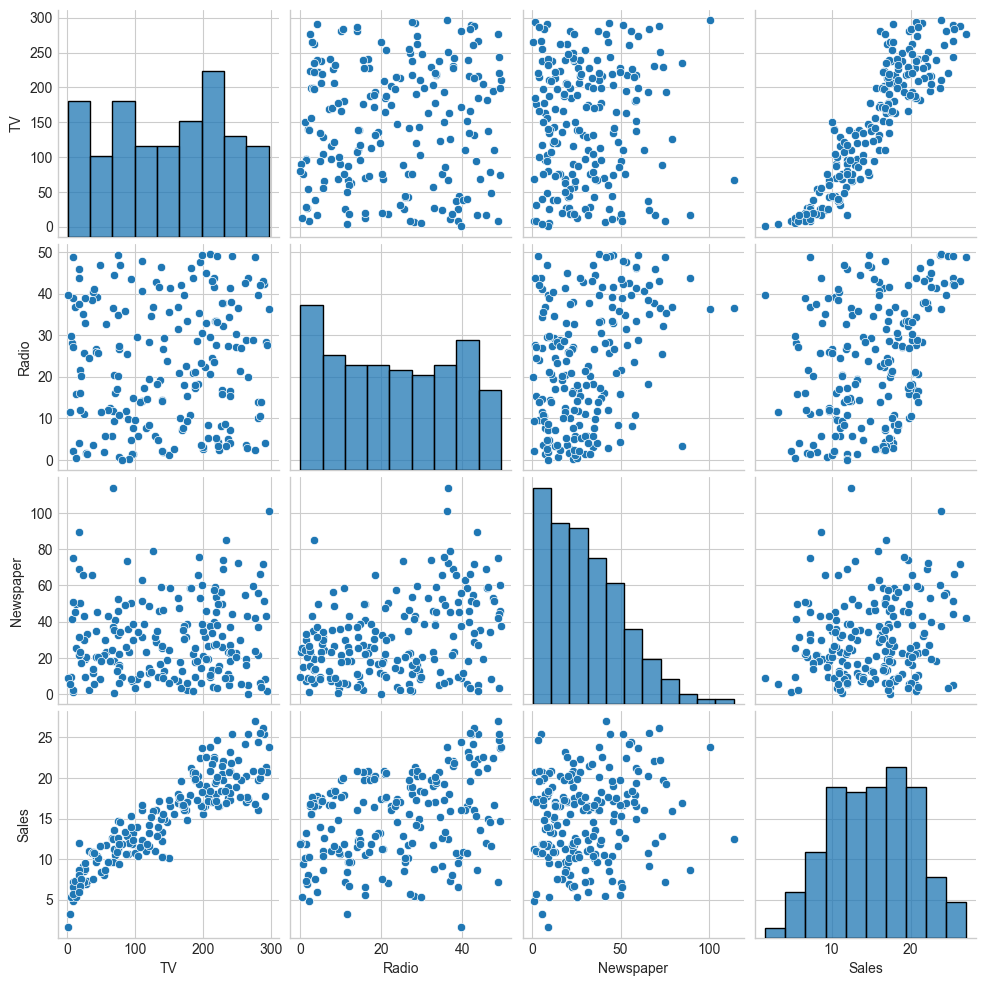

In [12]:
sns.pairplot(data=adv)

### Correlation

In [13]:
adv.corr() # Pearson's correlation coefficient
# Spearman's correlation coefficient

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


## Build regresssion model

1. Create X and y

In [14]:
X=adv['TV']
y=adv['Sales']

2. Create Train and Test sets(7:3, 8:2)

In [15]:
X_train, X_test, y_train, y_test= train_test_split(X,y, train_size=0.70, random_state=100)

3. Training the model on training set (i.e. learn the coefficient) Using StatsModels

In [16]:
X_train_sm=sm.add_constant(X_train)
X_train_sm.head()

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3


In [17]:
# Training(fitting) the  model
# sm: statsmodel.OLS <- Ordinary Least Squares
lr=sm.OLS(y_train, X_train_sm) # initialization
lr_model=lr.fit() # fitting / training
lr_model.params

const    6.948683
TV       0.054546
dtype: float64

Visualization

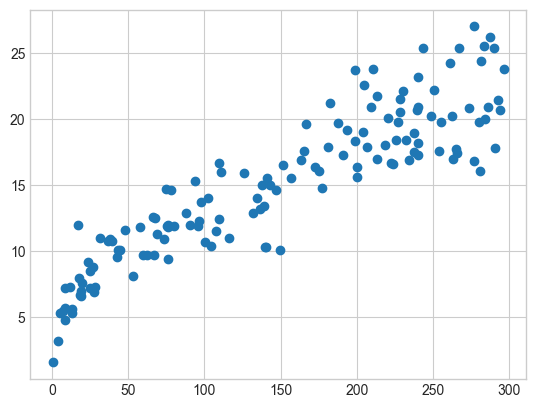

In [18]:
plt.scatter(X_train, y_train)

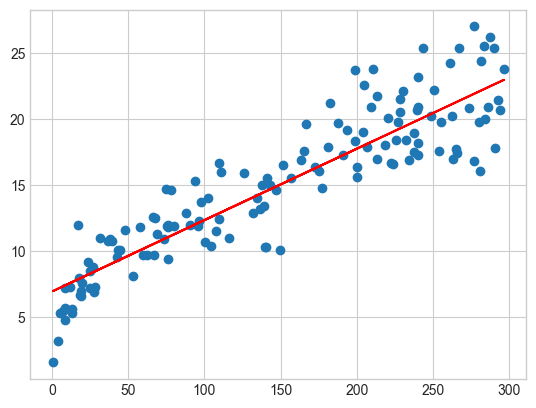

In [19]:
# Scatterplot with regression line
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948+0.054*X_train,'r')
plt.show()

## Residual Analysis

To validate assumptions of the model, and hence the reliability for inference

### Distribution of the error terms

We need to check if the error terms are also **normally distributed** (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [20]:
# Calculate the residuals
y_train_pred=lr_model.predict(X_train_sm)

residual = y_train-y_train_pred
print(residual.sum())
print(residual)

4.707345624410664e-13
74    -1.588747
3      1.287635
185    4.469437
26     0.256729
90    -0.274178
         ...   
87     3.013102
103    2.502170
67    -1.146907
24    -0.646884
8     -2.617777
Length: 140, dtype: float64


Plot the Residuals Histogram

Text(0.5, 1.0, 'Residual Plot')

<Figure size 640x480 with 0 Axes>

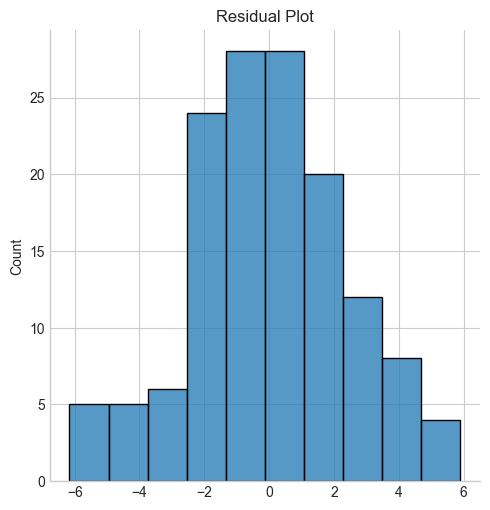

In [21]:
plt.figure()
sns.displot(residual)
plt.title("Residual Plot")

Plot residual scatterplot along the x-axis

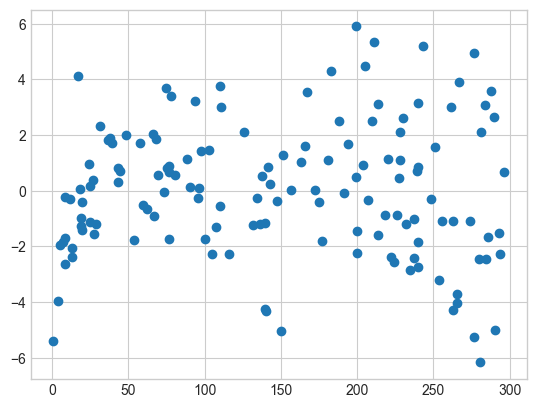

In [22]:
plt.scatter(X_train, residual)
plt.show()

## Model summary

In [23]:
lr_model.summary() # OLS

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Thu, 28 Sep 2023   Prob (F-statistic):           1.52e-52
Time:                        09:14:29   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Linear Regression using linear_model in sklearn

In [24]:
from sklearn.model_selection import train_test_split
from scipy import stats

X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [25]:
X_train_lm = X_train_lm.values.reshape(-1,1)
X_test_lm = X_test_lm.values.reshape(-1,1)
print(X_train_lm.shape)
print(y_train_lm.shape)
print(X_test_lm.shape)
print(y_test_lm.shape)

(140, 1)
(140,)
(60, 1)
(60,)


In [26]:
from sklearn.linear_model import LinearRegression

# Representing LinearRegression as lm(Creating LinearRegression Object)
lm = LinearRegression()

# Fit the model using lr.fit()
lm.fit(X_train_lm, y_train_lm)
print(lm.intercept_)
print(lm.coef_)

6.948683200001362
[0.05454575]


### Confidence Interval

In [27]:
# Get the coefficients and mean squared error of the residuals
coefficients = lm.coef_
mse_resid = np.mean((lm.predict(X_train_lm) - y_train_lm) ** 2)

In [28]:
# Calculate the standard error of each coefficient
n = len(y_train_lm)
k = len(X_train_lm[0])
std_err = np.sqrt(mse_resid / (n - k) * np.diag(np.linalg.inv(np.dot(X_train_lm.T, X_train_lm))))

In [29]:
# Calculate the confidence interval for each coefficient
alpha = 0.05
t_value = stats.t.ppf(1 - alpha / 2, n - k)
conf_int = np.vstack((coefficients - t_value * std_err, coefficients + t_value * std_err)).T
print(conf_int)

[[0.05435073 0.05474078]]


## Residuals

In [30]:
prediction = lm.predict(X_test_lm)
residual = (y_test_lm - prediction)

## Metrics

In [31]:
from sklearn.metrics import mean_squared_error, r2_score # Coefficient of Determination R^2

In [32]:
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test_lm, prediction))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test_lm, prediction))

Mean squared error: 4.08
Coefficient of determination: 0.79


## Plot the outputs

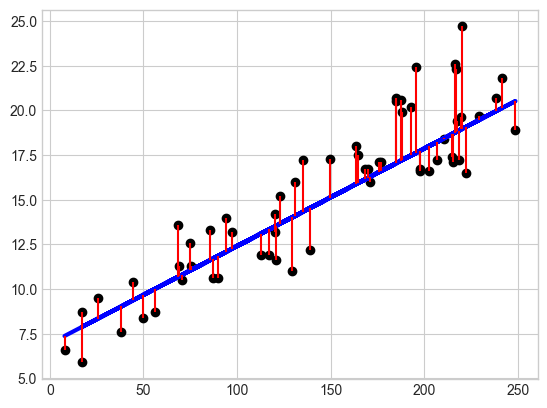

In [33]:
# Plot regression line with residuals
plt.scatter(X_test_lm, y_test_lm, color="black")
plt.plot(X_test_lm, prediction, color="blue", linewidth=3)
plt.vlines(X_test_lm, prediction, y_test_lm, color='r')

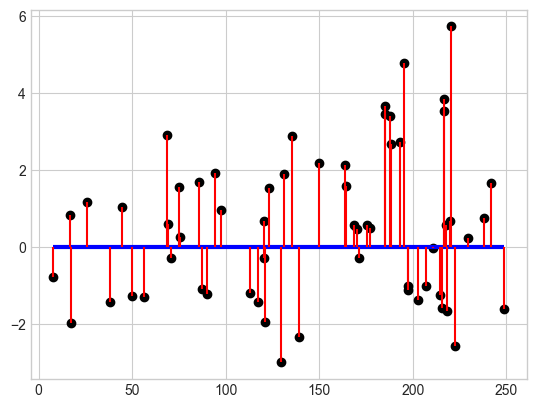

In [34]:
# Residual Plot

plt.scatter(X_test_lm, y_test_lm - prediction, color="black")
plt.hlines(0, min(X_test_lm), max(X_test_lm), color='b', linewidth=3)
plt.vlines(X_test_lm, 0, y_test_lm - prediction, color='r')

--------

### References



1.   https://www.mishrark.com/machine-learning/3-regression/simple-linear-regression-in-python
2.   https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
3.   https://medium.com/dsc-polimi-journal/machine-learning-with-google-colab-73e74cfe8ea2
4.   https://learn.saylor.org/mod/page/view.php?id=55340

